---
title: "LOCZCIT-IQR - Workflow Completo"
format:
  pdf:
    papersize: letter
    geometry: landscape
---

# LOCZCIT-IQR - Workflow Completo 
***(Apenas um exemplo de fluxo de trabalho. Pois o operacional pode adapatar o monitoramento conforme a necissidade do colegiado)***

***Autor: Elivaldo Carvalho Rocha***

## Exemplos Práticos da Metodologia para Identificação da ZCIT

Este documento demonstra o workflow completo da metodologia LOCZCIT-IQR para identificação da Zona de Convergência Intertropical (ZCIT) usando:
- **Core**: data_loader, processor, iqr_detector, spline_interpolator
- **Utils**: funções de pentadas e validadores
- **Plotting**: visualização dos resultados

**Analogia Principal**: Imagine a metodologia LOCZCIT-IQR como uma **linha de produção industrial** onde:
1. 🔧 **processor** = Operador que prepara e organiza a matéria-prima (dados OLR em pentadas)
2. 🔍 **iqr_detector** = Inspetor de qualidade que remove produtos defeituosos (outliers)
3. ✏️ **spline_interpolator** = Artesão que cria a linha suave final (interpolação)
4. 📊 **visualizer** = Designer que apresenta o produto final de forma elegante

---

In [65]:
import loczcit_iqr as lz

# Ver guia interativo
lz.quick_start_guide()

# Verificar módulos disponíveis
lz.check_modules()

🌊 LOCZCIT-IQR - Guia Rápido de Uso
📚 Biblioteca para análise da ZCIT com detecção IQR de outliers

🚀 ANÁLISE RÁPIDA (3 passos):
   1️⃣  import loczcit_iqr as lz
   2️⃣  coords = lz.DataProcessor().find_minimum_coordinates(data)
   3️⃣  status = lz.analise_zcit_rapida(-0.5, 3)  # lat, mês

📊 CARREGAMENTO DE DADOS:
   loader = lz.NOAADataLoader()
   data = loader.load_data('2024-03-01', '2024-03-31')
   # Busca automática + download + processamento

🔍 DETECÇÃO DE OUTLIERS:
   detector = lz.IQRDetector(constant=1.5)
   validos, outliers, stats = detector.detect_outliers(coords)
   # Método IQR científico para dados climáticos

📈 INTERPOLAÇÃO E LINHAS:
   interpolator = lz.SplineInterpolator()
   linha_zcit, estatisticas = interpolator.interpolate(coords)
   # Cria linhas suaves da ZCIT

🎨 VISUALIZAÇÃO PROFISSIONAL:
   viz = lz.ZCITVisualizer(template='publication')
   fig, ax = viz.quick_plot(data, pentada=30)
   # Mapas prontos para artigos científicos

🌡️ ANÁLISE CLIMATOLÓGICA:
   # Com

{'core': {'data_loader': True,
  'processor': True,
  'iqr_detector': True,
  'spline_interpolator': True,
  'climatologia': True,
  'all_available': True},
 'plotting': {'visualizer': True, 'style': True, 'all_available': True},
 'utils': {'pentadas': True, 'validators': True, 'all_available': True}}

## 📦 1. Importações e Setup Inicial

In [49]:
# Importações principais
import loczcit_iqr as lz
from datetime import datetime
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
import os

# Configurar logging para ver detalhes
import logging
logging.basicConfig(level=logging.INFO)

# Verificar módulos disponíveis
print("\n📊 Verificando módulos LOCZCIT-IQR...\n")
status = lz.check_modules()

print("\n✅ Setup inicial completo!")


📊 Verificando módulos LOCZCIT-IQR...

🌊 LOCZCIT-IQR - Status dos Módulos

📦 CORE:
   ✅ data_loader
   ✅ processor
   ✅ iqr_detector
   ✅ spline_interpolator
   ✅ climatologia
   ✅ Status core: Completo

📦 PLOTTING:
   ✅ visualizer
   ✅ style
   ✅ Status plotting: Completo

📦 UTILS:
   ✅ pentadas
   ✅ validators
   ✅ Status utils: Completo

💡 RECOMENDAÇÕES:
   🎉 Todos os módulos estão funcionando perfeitamente!

📚 Para começar, use: lz.quick_start_guide()

✅ Setup inicial completo!


---

## 🌡️ 2. Carregamento dos Dados OLR

**Analogia**: Esta etapa é como **receber a matéria-prima na fábrica** - precisamos dos dados brutos de radiação para começar a processar.

In [50]:
# Criar instância do loader
loader = lz.NOAADataLoader(cache_dir='./data_cache')

# Definir período de análise
ano = 2025
start_date = f'{ano}-01-01'
end_date = f'{ano}-12-31'

print(f"📡 Carregando dados OLR para {ano}...\n")

# Carregar dados com a estratégia de dupla escala
# Retorna: (dados_globais, dados_area_estudo)
dados_globais, dados_area = loader.load_data_dual_scale(
    start_date=start_date,
    end_date=end_date,
    study_area=None,  # Usa geometria padrão
    auto_download=True,
    quality_control=True,
    remove_leap_days=True,
    return_study_area_subset=True,
    mask_to_shape=True
)

print(f"\n✅ Dados carregados com sucesso!")
print(f"📊 Dados globais: {dados_globais.dims}")
print(f"📊 Dados área de estudo: {dados_area.dims}")

2025-10-05 14:17:19,673 - loczcit_iqr.core.data_loader - INFO - 🌍 Carregando dados com estratégia dupla escala...
INFO:loczcit_iqr.core.data_loader:🌍 Carregando dados com estratégia dupla escala...
2025-10-05 14:17:19,674 - loczcit_iqr.core.data_loader - INFO - 🏪 ETAPA 0: Verificando cache local primeiro...
INFO:loczcit_iqr.core.data_loader:🏪 ETAPA 0: Verificando cache local primeiro...
2025-10-05 14:17:19,676 - loczcit_iqr.core.data_loader - INFO - 📋 Encontrados 3 arquivos em cache
INFO:loczcit_iqr.core.data_loader:📋 Encontrados 3 arquivos em cache
2025-10-05 14:17:19,677 - loczcit_iqr.core.data_loader - INFO - 🔍 Procurando arquivos do ano no cache...
INFO:loczcit_iqr.core.data_loader:🔍 Procurando arquivos do ano no cache...
2025-10-05 14:17:19,783 - loczcit_iqr.core.data_loader - INFO - ✅ Arquivo do ano encontrado no cache: olr-daily_v01r02-preliminary_20250101_20250907.nc
INFO:loczcit_iqr.core.data_loader:✅ Arquivo do ano encontrado no cache: olr-daily_v01r02-preliminary_20250101_20

📡 Carregando dados OLR para 2025...



2025-10-05 14:17:20,116 - loczcit_iqr.core.data_loader - INFO - ✅ Dados globais carregados: Frozen({'time': 250, 'lat': 180, 'lon': 360, 'bnds': 2})
INFO:loczcit_iqr.core.data_loader:✅ Dados globais carregados: Frozen({'time': 250, 'lat': 180, 'lon': 360, 'bnds': 2})
2025-10-05 14:17:20,117 - loczcit_iqr.core.data_loader - INFO - 🎯 Processando subset da área de estudo...
INFO:loczcit_iqr.core.data_loader:🎯 Processando subset da área de estudo...
2025-10-05 14:17:20,119 - loczcit_iqr.core.data_loader - INFO - 📍 Carregando geometria padrão de: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet
INFO:loczcit_iqr.core.data_loader:📍 Carregando geometria padrão de: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet
2025-10-05 14:17:20,126 - loczcit_iqr.core.data_loader - INFO - 🎭 Mascarando dados para a forma da geometria...
INFO:loczcit_iqr.core.data_loader:🎭 Mascarando dados para a forma da geometria...
2025-10-05 14:17:20,436 - loczcit_iqr.core.data_lo

✅ Dados globais: Frozen({'time': 250, 'lat': 180, 'lon': 360, 'bnds': 2})
✅ Study area: Frozen({'time': 250, 'lat': 25, 'lon': 38, 'bnds': 2})

✅ Dados carregados com sucesso!
📊 Dados globais: FrozenMappingWarningOnValuesAccess({'time': 250, 'lat': 180, 'lon': 360, 'bnds': 2})
📊 Dados área de estudo: FrozenMappingWarningOnValuesAccess({'time': 250, 'lat': 25, 'lon': 38, 'bnds': 2})


---

## 🔧 3. Processamento em Pentadas (processor)

**Analogia**: O **processor** é como um **operador de máquina** que:
- Corta a matéria-prima em pedaços uniformes (pentadas de 5-6 dias)
- Organiza cada peça em uma esteira de produção numerada (pentada 1, 2, 3...)
- Garante que cada peça esteja dentro das especificações de qualidade

**Pentadas**: Períodos de 5-6 dias que facilitam análises climáticas (72-73 pentadas por ano).


In [51]:
# Criar instância do DataProcessor
processor = lz.DataProcessor(
    use_dask=True,
    n_workers=4
)

print(f"🔧 Processando dados em pentadas para {ano}...\n")

# Criar pentadas dos dados da área de estudo
pentadas_dataset = processor.create_pentads(
    olr_data = dados_area,
    year = ano,
    remove_leap_days = True,
    method = 'mean',  # Média dos valores em cada pentada
    min_days_required = 3
)

print(f"\n✅ Pentadas criadas!")
print(f"📊 Dimensões: {pentadas_dataset.dims}")
print(f"📊 Variáveis: {list(pentadas_dataset.data_vars)}")
print(f"\n📅 Total de pentadas: {pentadas_dataset.dims['pentada']}")

# Verificar uma pentada específica usando utils
pentada_num = 10
datas_pentada = lz.pentada_to_dates(pentada_num, ano)
print(f"\n🗓️ Exemplo - Pentada {pentada_num}: {datas_pentada[0]} a {datas_pentada[-1]}")

print("\n")
print(pentadas_dataset)

2025-10-05 14:17:20,535 - loczcit_iqr.core.processor - INFO - Arquivo padrão da área de estudo encontrado: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet


INFO:loczcit_iqr.core.processor:Arquivo padrão da área de estudo encontrado: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet


🔧 Processando dados em pentadas para 2025...

2025-10-05 14:17:20,537 - loczcit_iqr.core.processor - INFO - Criando pentadas para 2025 (método: mean, remover bissextos: True)


INFO:loczcit_iqr.core.processor:Criando pentadas para 2025 (método: mean, remover bissextos: True)


2025-10-05 14:17:20,765 - loczcit_iqr.core.processor - INFO - Pentadas para 2025 criadas com sucesso


INFO:loczcit_iqr.core.processor:Pentadas para 2025 criadas com sucesso



✅ Pentadas criadas!
📊 Dimensões: FrozenMappingWarningOnValuesAccess({'pentada': 73, 'lat': 25, 'lon': 38, 'bnds': 2})
📊 Variáveis: ['olr', 'lon_bounds', 'lat_bounds', 'qc_flag', 'time_bounds']

📅 Total de pentadas: 73

🗓️ Exemplo - Pentada 10: 2025-02-15 00:00:00 a 2025-02-19 00:00:00


<xarray.Dataset> Size: 4MB
Dimensions:      (pentada: 73, lat: 25, lon: 38, bnds: 2)
Coordinates:
  * lat          (lat) float32 100B -9.5 -8.5 -7.5 -6.5 ... 11.5 12.5 13.5 14.5
  * lon          (lon) float32 152B -47.5 -46.5 -45.5 ... -12.5 -11.5 -10.5
  * pentada      (pentada) int64 584B 1 2 3 4 5 6 7 8 ... 67 68 69 70 71 72 73
    time         (pentada) datetime64[us] 584B 2025-01-03 ... 2025-12-29
Dimensions without coordinates: bnds
Data variables:
    olr          (pentada, lat, lon) float64 555kB nan nan nan ... nan nan nan
    lon_bounds   (pentada, lon, bnds, lat) float64 1MB nan nan nan ... nan nan
    lat_bounds   (pentada, lat, bnds, lon) float64 1MB nan nan nan ... nan nan
    qc_flag    

## ⚠️ Observação Importante: 
*Dados Incompletos do Ano Corrente*

*Comportamento Esperado*

Os datasets do ano corrente naturalmente não conterão dados de OLR para todos os dias, uma vez que o ano ainda está em andamento.

Tratamento Automático pela Função ao processar os dados com processor.create_pentads(), a função implementa um tratamento inteligente:

Pentadas com dados disponíveis: 

são calculadas normalmente

Pentadas futuras (ainda não ocorridas): 

recebem automaticamente valores NA (missing values)

Esse comportamento garante a consistência da estrutura temporal dos dados, mantendo todas as pentadas do ano mesmo quando os dados ainda não estão disponíveis.

In [52]:
print(pentadas_dataset)

<xarray.Dataset> Size: 4MB
Dimensions:      (pentada: 73, lat: 25, lon: 38, bnds: 2)
Coordinates:
  * lat          (lat) float32 100B -9.5 -8.5 -7.5 -6.5 ... 11.5 12.5 13.5 14.5
  * lon          (lon) float32 152B -47.5 -46.5 -45.5 ... -12.5 -11.5 -10.5
  * pentada      (pentada) int64 584B 1 2 3 4 5 6 7 8 ... 67 68 69 70 71 72 73
    time         (pentada) datetime64[us] 584B 2025-01-03 ... 2025-12-29
Dimensions without coordinates: bnds
Data variables:
    olr          (pentada, lat, lon) float64 555kB nan nan nan ... nan nan nan
    lon_bounds   (pentada, lon, bnds, lat) float64 1MB nan nan nan ... nan nan
    lat_bounds   (pentada, lat, bnds, lon) float64 1MB nan nan nan ... nan nan
    qc_flag      (pentada, lat, lon) float64 555kB nan nan nan ... nan nan nan
    time_bounds  (pentada, bnds, lat, lon) float64 1MB nan nan nan ... nan nan
Attributes:
    processed_year:                   2025
    creation_date_utc:                2025-10-05T17:17:20.764467Z
    pentad_aggregation_me

In [63]:
print(pentadas_dataset['olr'].sel(pentada=1))

<xarray.DataArray 'olr' (lat: 25, lon: 38)> Size: 8kB
array([[         nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan, 285.37026978, 284.35342407,
        283.72262573, 281.91589355, 279.44622803, 280.12271118,
        278.43951416, 278.01089478, 277.96160889, 278.40789795,
        277.9854126 , 282.80215454, 284.57736206, 283.72784424,
        284.23403931, 284.82427979, 284.51342773, 284.41668701,
        283.59155273, 283.72525024, 282.00683594, 280.07608032,
        277.59136963, 278.01065063],
       [         nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,
                 nan,          nan, 284.20632935, 283.20578003,
        281.52700806, 279.16464233, 276.5663147 , 275.82000732,
        275.3

In [64]:
print(pentadas_dataset['olr'].sel(pentada=51))


<xarray.DataArray 'olr' (lat: 25, lon: 38)> Size: 8kB
array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, 

### 3.1 Encontrar Coordenadas de Mínimos OLR

**Conceito**: A ZCIT está associada aos **mínimos de OLR** (Outgoing Longwave Radiation), pois:
- Nuvens convectivas intensas = mais radiação absorvida = menos radiação emitida ao espaço
- Portanto, valores baixos de OLR indicam forte atividade convectiva (onde está a ZCIT)

In [55]:
print("🔍 Identificando coordenadas de mínimos OLR...\n")

# Extrair os valores de OLR da pentada de interesse
num_pentada = 11 # Exemplo: 11° pentada
# Extrair os valores de OLR das pentadas
pentada_data = pentadas_dataset.sel(pentada=num_pentada)["olr"]

# Encontrar coordenadas de mínimos para cada longitude
min_coords_list= processor.find_minimum_coordinates(
    data_array=pentada_data, # xr.DataArray Array 2D (lat, lon) com valores de OLR
    search_radius=1, # Raio em pixels para verificar mínimos locais
    method="column_minimum",  # Método de busca do mínimo
    olr_valid_range= (50.0, 450.0) # Faixa válida de valores de OLR Metadados da NOAA
)

print("\n")
print(min_coords_list)

🔍 Identificando coordenadas de mínimos OLR...

2025-10-05 14:17:20,810 - loczcit_iqr.core.processor - INFO - Buscando mínimos de OLR (método: column_minimum, threshold: None, raio: 1px)


INFO:loczcit_iqr.core.processor:Buscando mínimos de OLR (método: column_minimum, threshold: None, raio: 1px)


2025-10-05 14:17:20,812 - loczcit_iqr.core.processor - INFO - Carregando área de estudo de: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet


INFO:loczcit_iqr.core.processor:Carregando área de estudo de: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet


2025-10-05 14:17:20,827 - loczcit_iqr.core.processor - INFO - Encontradas 8 coordenadas de mínimo


INFO:loczcit_iqr.core.processor:Encontradas 8 coordenadas de mínimo




[(-47.5, 1.5), (-41.5, 1.5), (-37.5, -2.5), (-31.5, -3.5), (-26.5, -3.5), (-21.5, -2.5), (-17.5, 1.5), (-12.5, 4.5)]


---

## 🔍 4. Detecção de Outliers (IQRDetector)

**Analogia**: O **IQRDetector** é como um **inspetor de controle de qualidade** que:
- Examina cada peça (coordenada) na esteira de produção
- Usa uma régua estatística (Intervalo Interquartil - IQR) para medir se está dentro dos padrões
- Remove peças defeituosas (outliers) que poderiam comprometer o produto final

**IQR (Interquartile Range)**: Método robusto que identifica valores anormalmente distantes do padrão:
- Calcula Q1 (25%) e Q3 (75%) da distribuição das latitudes
- Define limites: [Q1 - 1.5×IQR, Q3 + 1.5×IQR]
- Remove coordenadas fora desses limites

In [56]:
# Criar instância do IQRDetector
# Constante multiplicativa para o IQR (default: 1.5)
detector = lz.IQRDetector(constant = 1.5)

# Aplicar detecção de outliers
# Aplicar o detector nas coordenadas encontradas
coords_validas, coords_outliers, estatisticas = detector.detect_outliers(
    coordinates=min_coords_list
)

print("\n")
# Imprimir os resultados para ver o que foi filtrado
print(f"Coordenadas Válidas ({len(coords_validas)}):")
print(coords_validas)

print(f"\nOutliers Detectados ({len(coords_outliers)}):")
print(coords_outliers)

# Visualizar as principais estatísticas da análise de latitude
print("\n--- Estatísticas da Análise ---")
print(f"Total de Pontos Analisados: {estatisticas['total_coordinates']}")
print(f"Mediana da Latitude (Q2): {estatisticas['median']:.2f}")
print(f"Intervalo Interquartílico (IQR): {estatisticas['iqr']:.2f}")
print(f"Limite Inferior para ser válido: {estatisticas['lower_limit']:.2f}")
print(f"Limite Superior para ser válido: {estatisticas['upper_limit']:.2f}")

# Exemplo de interpretação:
# Qualquer coordenada com latitude MENOR que o 'Limite Inferior' ou MAIOR que o
# 'Limite Superior' foi classificada como um outlier.


2025-10-05 14:17:20,835 - loczcit_iqr.core.iqr_detector - INFO - IQRDetector inicializado com constante: 1.5
2025-10-05 14:17:20,836 - loczcit_iqr.core.iqr_detector - INFO - Detectando outliers em 8 coordenadas (analisando latitude)
2025-10-05 14:17:20,837 - loczcit_iqr.core.iqr_detector - INFO - Detecção concluída: 8 válidas, 0 outliers


Coordenadas Válidas (8):
[(-47.5, 1.5), (-41.5, 1.5), (-37.5, -2.5), (-31.5, -3.5), (-26.5, -3.5), (-21.5, -2.5), (-17.5, 1.5), (-12.5, 4.5)]

Outliers Detectados (0):
[]

--- Estatísticas da Análise ---
Total de Pontos Analisados: 8
Mediana da Latitude (Q2): -0.50
Intervalo Interquartílico (IQR): 4.25
Limite Inferior para ser válido: -9.12
Limite Superior para ser válido: 7.88


---

## ✏️ 5. Interpolação com Splines (SplineInterpolator)

**Analogia**: O **SplineInterpolator** é como um **artesão especializado** que:
- Recebe pontos discretos (coordenadas válidas após IQR)
- Usa uma régua flexível matemática (B-spline) para traçar uma curva suave
- Considera pesos especiais (latitudes próximas ao equador têm mais importância)
- Produz uma linha contínua e esteticamente agradável representando a ZCIT

**B-Splines**: Curvas matemáticas suaves que passam próximo aos pontos de controle sem oscilações bruscas.

**Matriz de Pesos**: Dá mais importância às latitudes próximas ao equador, pois é onde a ZCIT tipicamente se localiza.

2025-10-05 14:17:20,847 - loczcit_iqr.core.spline_interpolator - INFO - SplineInterpolator inicializado: método='bspline', lat_ref=0.00°
✏️ Interpolando Pentada 11 com B-spline...

2025-10-05 14:17:20,848 - loczcit_iqr.core.spline_interpolator - INFO - Interpolando 8 coordenadas: método=bspline, pontos_saída=100
✅ Interpolação completa!

📊 Resultado:
   - Método usado: bspline
   - Pontos de entrada: 8
   - Pontos de saída: 100
   - Linha ZCIT: 100 coordenadas

🎯 Relatório de Qualidade da Interpolação
---------------------------------------------
Status Geral: Válida ✅
Problemas: Nenhum problema detectado.

Métricas Principais:
  - Curvatura Máxima: 0.067
  - Oscilação da Linha: 0.010
  - Maior Salto (Latitude): 0.438°
---------------------------------------------


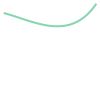

In [57]:
# Criar instância do SplineInterpolator
interpolator = lz.SplineInterpolator(
    default_method="bspline",  # Método de interpolação (bspline, cubic, weighted)
    default_smooth_factor="auto", # Grau da spline (3 = cúbica, suave)
    default_degree=3, # Grau padrão do spline
    min_input_points=3, # Número mínimo de pontos de entrada (default: 3)
    # Linha do Equador - Latitude de referência padrão
    default_reference_latitude= 0 # (default: 0.0).
)

# Interpolar a pentada exemplo
print(f"✏️ Interpolando Pentada {num_pentada} com B-spline...\n")

linha_zcit, stats_interp = interpolator.interpolate(
    # Lista de coordenadas (longitude, latitude).
    coordinates=coords_validas,
    # Parâmetros de interpolação (usa padrões se None).
    parameters=None,
    # Criar linhas de +1/-1 desvio padrão
    create_bounds_lines=True
)

print(f"✅ Interpolação completa!")
print(f"\n📊 Resultado:")
print(f"   - Método usado: {stats_interp['method_used']}")
print(f"   - Pontos de entrada: {stats_interp['input_points_count']}")
print(f"   - Pontos de saída: {stats_interp['output_points_count']}")
print(f"   - Linha ZCIT: {len(linha_zcit.coords)} coordenadas")

# --- RELATÓRIO DE QUALIDADE (VERSÃO SIMPLES) ---
quality = stats_interp['quality_assessment']
metrics = quality['metrics']

print("\n🎯 Relatório de Qualidade da Interpolação")
print("---------------------------------------------")

# Status Geral
status = "Válida" if quality['is_valid'] else "Inválida"
print(f"Status Geral: {status} ✅")

# Problemas Encontrados
if quality['issues']:
    print(f"Problemas: {', '.join(quality['issues'])} ⚠️")
else:
    print("Problemas: Nenhum problema detectado.")

print("\nMétricas Principais:")
print(f"  - Curvatura Máxima: {metrics.get('max_absolute_curvature', 0):.3f}")
print(f"  - Oscilação da Linha: {metrics.get('oscillation_ratio', 0):.3f}")
print(f"  - Maior Salto (Latitude): {metrics.get('max_latitude_gap', 0):.3f}°")
print("---------------------------------------------")

linha_zcit


---

## 📊 6. Síntese do Fluxo de Trabalho e Visualização dos Resultados 

**Analogia**: O módulo de **plotting** é como um **designer de apresentação** que:
- Pega o produto final (linha da ZCIT interpolada)
- Cria uma embalagem atraente (mapas com contexto geográfico)
- Adiciona rótulos e informações (títulos, legendas, coordenadas)
- Apresenta tudo de forma profissional e compreensível

In [58]:
from loczcit_iqr.plotting.visualizer import *

from loczcit_iqr.plotting import plot_zcit_quick, ZCITVisualizer, check_plotting_dependencies, TEMPLATES

# Verificar dependências
status = check_plotting_dependencies()

# Usar templates
print(TEMPLATES.keys())

=== LOCZCIT Plotting Dependencies Status ===

CORE Dependencies:
  ✓ matplotlib      v3.10.6
  ✓ cartopy         v0.25.0
  ✓ numpy           v2.3.3
  ✓ xarray          v2025.9.0
  ✓ pandas          v2.3.2
  ✓ shapely         v2.1.2

OPTIONAL Dependencies:
  ✓ geopandas       v1.1.1
  ✓ scipy           v1.16.2
  ✓ pillow          v11.3.0
  ✓ imageio         v2.37.0

dict_keys(['publication', 'presentation', 'web', 'report'])


In [59]:
# Exemplo de uso
viz = ZCITVisualizer(template='publication')
print(f"Visualizador criado com template: {viz.config}")

# Testar diferentes paletas
for palette_name in ['classic', 'modern', 'high_contrast', 'grayscale']:
    cmap = ZCITColormap.get_colormap(palette_name)
    print(f"Paleta '{palette_name}' carregada: {cmap.name}")


Visualizador criado com template: {'figsize': (12, 10), 'dpi': 300, 'font_size': 12, 'title_size': 16, 'colormap': 'classic', 'grid': True, 'coastlines': True, 'borders': True}
Paleta 'classic' carregada: olr_classic
Paleta 'modern' carregada: viridis_r
Paleta 'high_contrast' carregada: RdBu_r
Paleta 'grayscale' carregada: gray_r


## Análise por pentadas

2025-10-05 14:17:20,882 - loczcit_iqr.core.processor - INFO - Arquivo padrão da área de estudo encontrado: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet


INFO:loczcit_iqr.core.processor:Arquivo padrão da área de estudo encontrado: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet


Carregando dados diários para 2025...


2025-10-05 14:17:23,186 - loczcit_iqr.core.data_loader - INFO - Buscando arquivo para o ano corrente (2025)...
INFO:loczcit_iqr.core.data_loader:Buscando arquivo para o ano corrente (2025)...
2025-10-05 14:17:23,187 - loczcit_iqr.core.data_loader - INFO - Arquivo do ano corrente encontrado: olr-daily_v01r02-preliminary_20250101_20250907.nc
INFO:loczcit_iqr.core.data_loader:Arquivo do ano corrente encontrado: olr-daily_v01r02-preliminary_20250101_20250907.nc
2025-10-05 14:17:23,188 - loczcit_iqr.core.data_loader - INFO - Carregando dados de: data_cache\olr-daily_v01r02-preliminary_20250101_20250907.nc
INFO:loczcit_iqr.core.data_loader:Carregando dados de: data_cache\olr-daily_v01r02-preliminary_20250101_20250907.nc
2025-10-05 14:17:23,412 - loczcit_iqr.core.data_loader - INFO - Dados carregados com sucesso: FrozenMappingWarningOnValuesAccess({'time': 250, 'lat': 180, 'lon': 360, 'bnds': 2})
INFO:loczcit_iqr.core.data_loader:Dados carregados com sucesso: FrozenMappingWarningOnValuesAcces

Criando pentadas a partir dos dados diários...
2025-10-05 14:17:23,428 - loczcit_iqr.core.processor - INFO - Criando pentadas para 2025 (método: mean, remover bissextos: True)


INFO:loczcit_iqr.core.processor:Criando pentadas para 2025 (método: mean, remover bissextos: True)


2025-10-05 14:17:23,524 - loczcit_iqr.core.processor - INFO - Aplicando chunks do Dask para processamento paralelo


INFO:loczcit_iqr.core.processor:Aplicando chunks do Dask para processamento paralelo


2025-10-05 14:17:24,583 - loczcit_iqr.core.processor - INFO - Computando resultados Dask...


INFO:loczcit_iqr.core.processor:Computando resultados Dask...


2025-10-05 14:17:28,075 - loczcit_iqr.core.processor - INFO - Pentadas para 2025 criadas com sucesso


INFO:loczcit_iqr.core.processor:Pentadas para 2025 criadas com sucesso


2025-10-05 14:17:28,084 - loczcit_iqr.core.iqr_detector - INFO - IQRDetector inicializado com constante: 1.5
2025-10-05 14:17:28,084 - loczcit_iqr.core.spline_interpolator - INFO - SplineInterpolator inicializado: método='bspline', lat_ref=0.00°
2025-10-05 14:17:28,086 - loczcit_iqr.core.processor - INFO - Buscando mínimos de OLR (método: column_minimum, threshold: None, raio: 1px)


INFO:loczcit_iqr.core.processor:Buscando mínimos de OLR (método: column_minimum, threshold: None, raio: 1px)


2025-10-05 14:17:28,087 - loczcit_iqr.core.processor - INFO - Carregando área de estudo de: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet


INFO:loczcit_iqr.core.processor:Carregando área de estudo de: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet


2025-10-05 14:17:28,106 - loczcit_iqr.core.processor - INFO - Encontradas 11 coordenadas de mínimo


INFO:loczcit_iqr.core.processor:Encontradas 11 coordenadas de mínimo


2025-10-05 14:17:28,107 - loczcit_iqr.core.iqr_detector - INFO - Detectando outliers em 11 coordenadas (analisando latitude)
2025-10-05 14:17:28,108 - loczcit_iqr.core.iqr_detector - INFO - Detecção concluída: 11 válidas, 0 outliers
2025-10-05 14:17:28,109 - loczcit_iqr.core.processor - INFO - Buscando mínimos de OLR (método: local_minimum, threshold: 230, raio: 2px)


INFO:loczcit_iqr.core.processor:Buscando mínimos de OLR (método: local_minimum, threshold: 230, raio: 2px)


2025-10-05 14:17:28,110 - loczcit_iqr.core.processor - INFO - Aplicando threshold OLR <= 230 W/m²


INFO:loczcit_iqr.core.processor:Aplicando threshold OLR <= 230 W/m²


2025-10-05 14:17:28,111 - loczcit_iqr.core.processor - INFO - Carregando área de estudo de: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet


INFO:loczcit_iqr.core.processor:Carregando área de estudo de: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet


2025-10-05 14:17:28,127 - loczcit_iqr.core.processor - INFO - Encontradas 9 coordenadas de mínimo


INFO:loczcit_iqr.core.processor:Encontradas 9 coordenadas de mínimo


2025-10-05 14:17:28,128 - loczcit_iqr.core.spline_interpolator - INFO - Interpolando 11 coordenadas: método=bspline, pontos_saída=100


INFO:loczcit_iqr.plotting.visualizer:Nenhum caminho fornecido. Usando área de estudo padrão.
INFO:loczcit_iqr.plotting.visualizer:Área de estudo de 'E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet' plotada com sucesso.



Iniciando a criação da visualização completa...
✅ Visualização completa pronta.


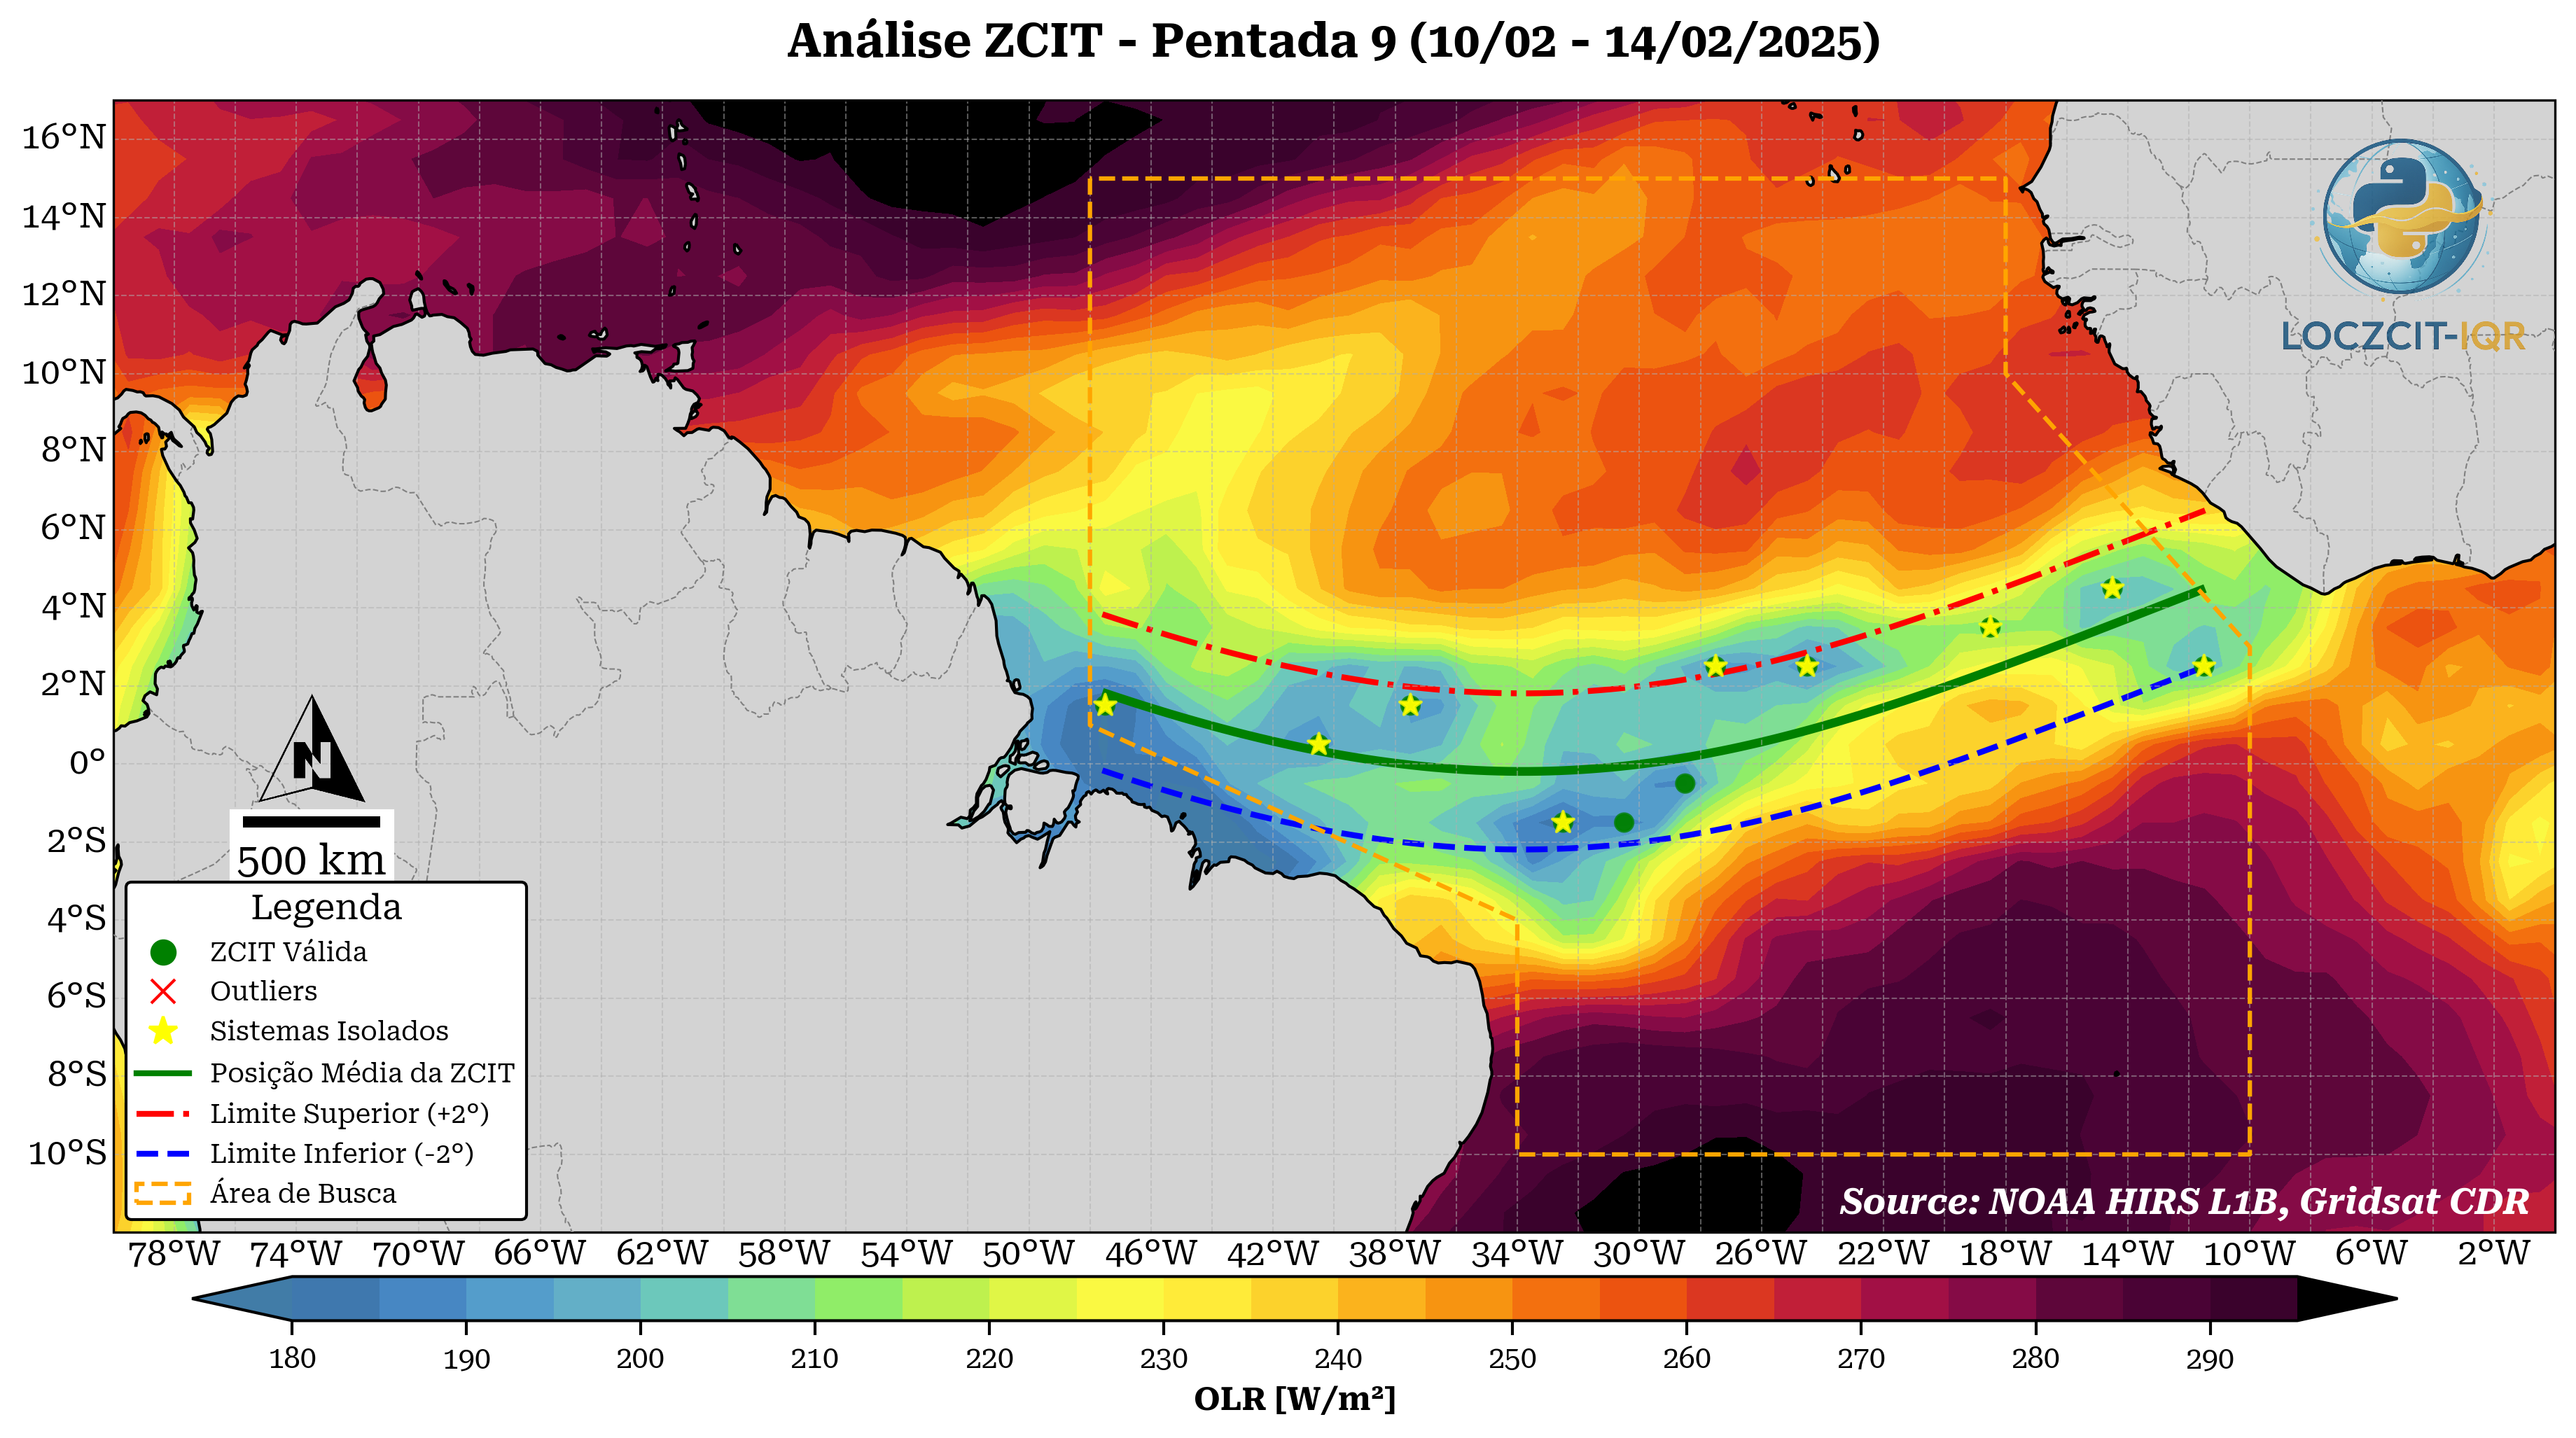

In [60]:
from loczcit_iqr.core.data_loader import NOAADataLoader
from loczcit_iqr.core.processor import DataProcessor
from loczcit_iqr.core.iqr_detector import IQRDetector
from loczcit_iqr.core.spline_interpolator import SplineInterpolator, SplineParameters, InterpolationMethod
from loczcit_iqr.plotting.visualizer import ZCITVisualizer
import matplotlib.pyplot as plt
import pandas as pd

# --- Carregar e Processar Dados de Pentadas ---
ano = 2025
loader = NOAADataLoader()
processor = DataProcessor()

print(f"Carregando dados diários para {ano}...")
olr_data = loader.load_data(start_date=f"{ano}-01-01", end_date=f"{ano}-12-31")

print("Criando pentadas a partir dos dados diários...")
pentads_year = processor.create_pentads(
    olr_data=olr_data, 
    year=ano,
    remove_leap_days=True,
    method='mean',
    min_days_required=3
)

# =============================================================================
# ANÁLISE DA ZCIT
# =============================================================================
PENTADA_ALVO = 9
detector = IQRDetector()
interpolator = SplineInterpolator()

# ⚠️ extrair o campo OLR 2D da pentada específica
olr_pentada = pentads_year['olr'].sel(pentada=PENTADA_ALVO)

min_coords = processor.find_minimum_coordinates(
    olr_pentada,
    threshold=None,
    method='column_minimum',
    search_radius=1
)

coords_valid, coords_outliers, resumo = detector.detect_outliers(min_coords)

sistemas_convectivos = processor.find_minimum_coordinates(
    olr_pentada,
    threshold=230,
    method='local_minimum',
    search_radius=2
)

params_bspline = SplineParameters(
    method=InterpolationMethod.BSPLINE,
    smooth_factor='high',
    degree=3,
    max_curvature_threshold=30,
    num_points_output=100,
    extrapolate_flag=True,
    reference_latitude=0
)

zcit_line, _ = interpolator.interpolate(coords_valid, parameters=params_bspline)

# =============================================================================
# CRIAR TÍTULO MANUALMENTE
# =============================================================================
# Obter as datas da pentada para o título
from loczcit_iqr.utils import pentada_to_dates

start_date, end_date = pentada_to_dates(PENTADA_ALVO, ano)
titulo_customizado = (
    f"Análise ZCIT - Pentada {PENTADA_ALVO} "
    f"({start_date.strftime('%d/%m')} - {end_date.strftime('%d/%m/%Y')})"
)

# =============================================================================
# VISUALIZAÇÃO
# =============================================================================
viz = ZCITVisualizer(template='publication')

# ✅ Agora passamos apenas o DataArray 2D e o título pronto
fig, ax = viz.plot_complete_analysis(
    olr_data=olr_pentada,  # ⚠️ DataArray 2D, NÃO o dataset completo
    title=titulo_customizado,  # ⚠️ Título customizado
    coords_valid=coords_valid,
    coords_outliers=coords_outliers,
    sistemas_convectivos=sistemas_convectivos,
    zcit_line=zcit_line,
    study_area_visible=True,
    save_path=None
)

plt.show()

## Monitoramento pelo último período disponível: últimos 5 dias no dataset

2025-10-05 14:17:29,066 - loczcit_iqr.core.processor - INFO - Arquivo padrão da área de estudo encontrado: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet


INFO:loczcit_iqr.core.processor:Arquivo padrão da área de estudo encontrado: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet


Carregando dados diários para 2025...


2025-10-05 14:17:31,431 - loczcit_iqr.core.data_loader - INFO - Buscando arquivo para o ano corrente (2025)...
INFO:loczcit_iqr.core.data_loader:Buscando arquivo para o ano corrente (2025)...
2025-10-05 14:17:31,432 - loczcit_iqr.core.data_loader - INFO - Arquivo do ano corrente encontrado: olr-daily_v01r02-preliminary_20250101_20250907.nc
INFO:loczcit_iqr.core.data_loader:Arquivo do ano corrente encontrado: olr-daily_v01r02-preliminary_20250101_20250907.nc
2025-10-05 14:17:31,433 - loczcit_iqr.core.data_loader - INFO - Carregando dados de: data_cache\olr-daily_v01r02-preliminary_20250101_20250907.nc
INFO:loczcit_iqr.core.data_loader:Carregando dados de: data_cache\olr-daily_v01r02-preliminary_20250101_20250907.nc
2025-10-05 14:17:31,639 - loczcit_iqr.core.data_loader - INFO - Dados carregados com sucesso: FrozenMappingWarningOnValuesAccess({'time': 250, 'lat': 180, 'lon': 360, 'bnds': 2})
INFO:loczcit_iqr.core.data_loader:Dados carregados com sucesso: FrozenMappingWarningOnValuesAcces


Calculando a média de OLR para o período mais recente...
2025-10-05 14:17:31,654 - loczcit_iqr.core.processor - INFO - Processando os últimos 5 dias: 2025-09-03 a 2025-09-07


INFO:loczcit_iqr.core.processor:Processando os últimos 5 dias: 2025-09-03 a 2025-09-07


2025-10-05 14:17:31,655 - loczcit_iqr.core.processor - INFO - Calculando mean para 5 dias (2025-09-03 a 2025-09-07)


INFO:loczcit_iqr.core.processor:Calculando mean para 5 dias (2025-09-03 a 2025-09-07)


Média recente calculada com sucesso.

Iniciando análise para o período recente...
2025-10-05 14:17:31,660 - loczcit_iqr.core.iqr_detector - INFO - IQRDetector inicializado com constante: 1.5
2025-10-05 14:17:31,660 - loczcit_iqr.core.spline_interpolator - INFO - SplineInterpolator inicializado: método='bspline', lat_ref=0.00°
2025-10-05 14:17:31,661 - loczcit_iqr.core.processor - INFO - Buscando mínimos de OLR (método: column_minimum, threshold: None, raio: 1px)


INFO:loczcit_iqr.core.processor:Buscando mínimos de OLR (método: column_minimum, threshold: None, raio: 1px)


2025-10-05 14:17:31,662 - loczcit_iqr.core.processor - INFO - Carregando área de estudo de: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet


INFO:loczcit_iqr.core.processor:Carregando área de estudo de: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet


2025-10-05 14:17:31,680 - loczcit_iqr.core.processor - INFO - Encontradas 8 coordenadas de mínimo


INFO:loczcit_iqr.core.processor:Encontradas 8 coordenadas de mínimo


2025-10-05 14:17:31,681 - loczcit_iqr.core.iqr_detector - INFO - Detectando outliers em 8 coordenadas (analisando latitude)
2025-10-05 14:17:31,682 - loczcit_iqr.core.iqr_detector - INFO - Detecção concluída: 8 válidas, 0 outliers
2025-10-05 14:17:31,682 - loczcit_iqr.core.processor - INFO - Buscando mínimos de OLR (método: local_minimum, threshold: 230, raio: 2px)


INFO:loczcit_iqr.core.processor:Buscando mínimos de OLR (método: local_minimum, threshold: 230, raio: 2px)


2025-10-05 14:17:31,684 - loczcit_iqr.core.processor - INFO - Aplicando threshold OLR <= 230 W/m²


INFO:loczcit_iqr.core.processor:Aplicando threshold OLR <= 230 W/m²


2025-10-05 14:17:31,685 - loczcit_iqr.core.processor - INFO - Carregando área de estudo de: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet


INFO:loczcit_iqr.core.processor:Carregando área de estudo de: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet


2025-10-05 14:17:31,701 - loczcit_iqr.core.processor - INFO - Encontradas 6 coordenadas de mínimo


INFO:loczcit_iqr.core.processor:Encontradas 6 coordenadas de mínimo


2025-10-05 14:17:31,702 - loczcit_iqr.core.spline_interpolator - INFO - Interpolando 8 coordenadas: método=bspline, pontos_saída=100


INFO:loczcit_iqr.plotting.visualizer:Nenhum caminho fornecido. Usando área de estudo padrão.
INFO:loczcit_iqr.plotting.visualizer:Área de estudo de 'E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet' plotada com sucesso.


Análise concluída.

Iniciando a criação da visualização completa...
✅ Visualização completa pronta.


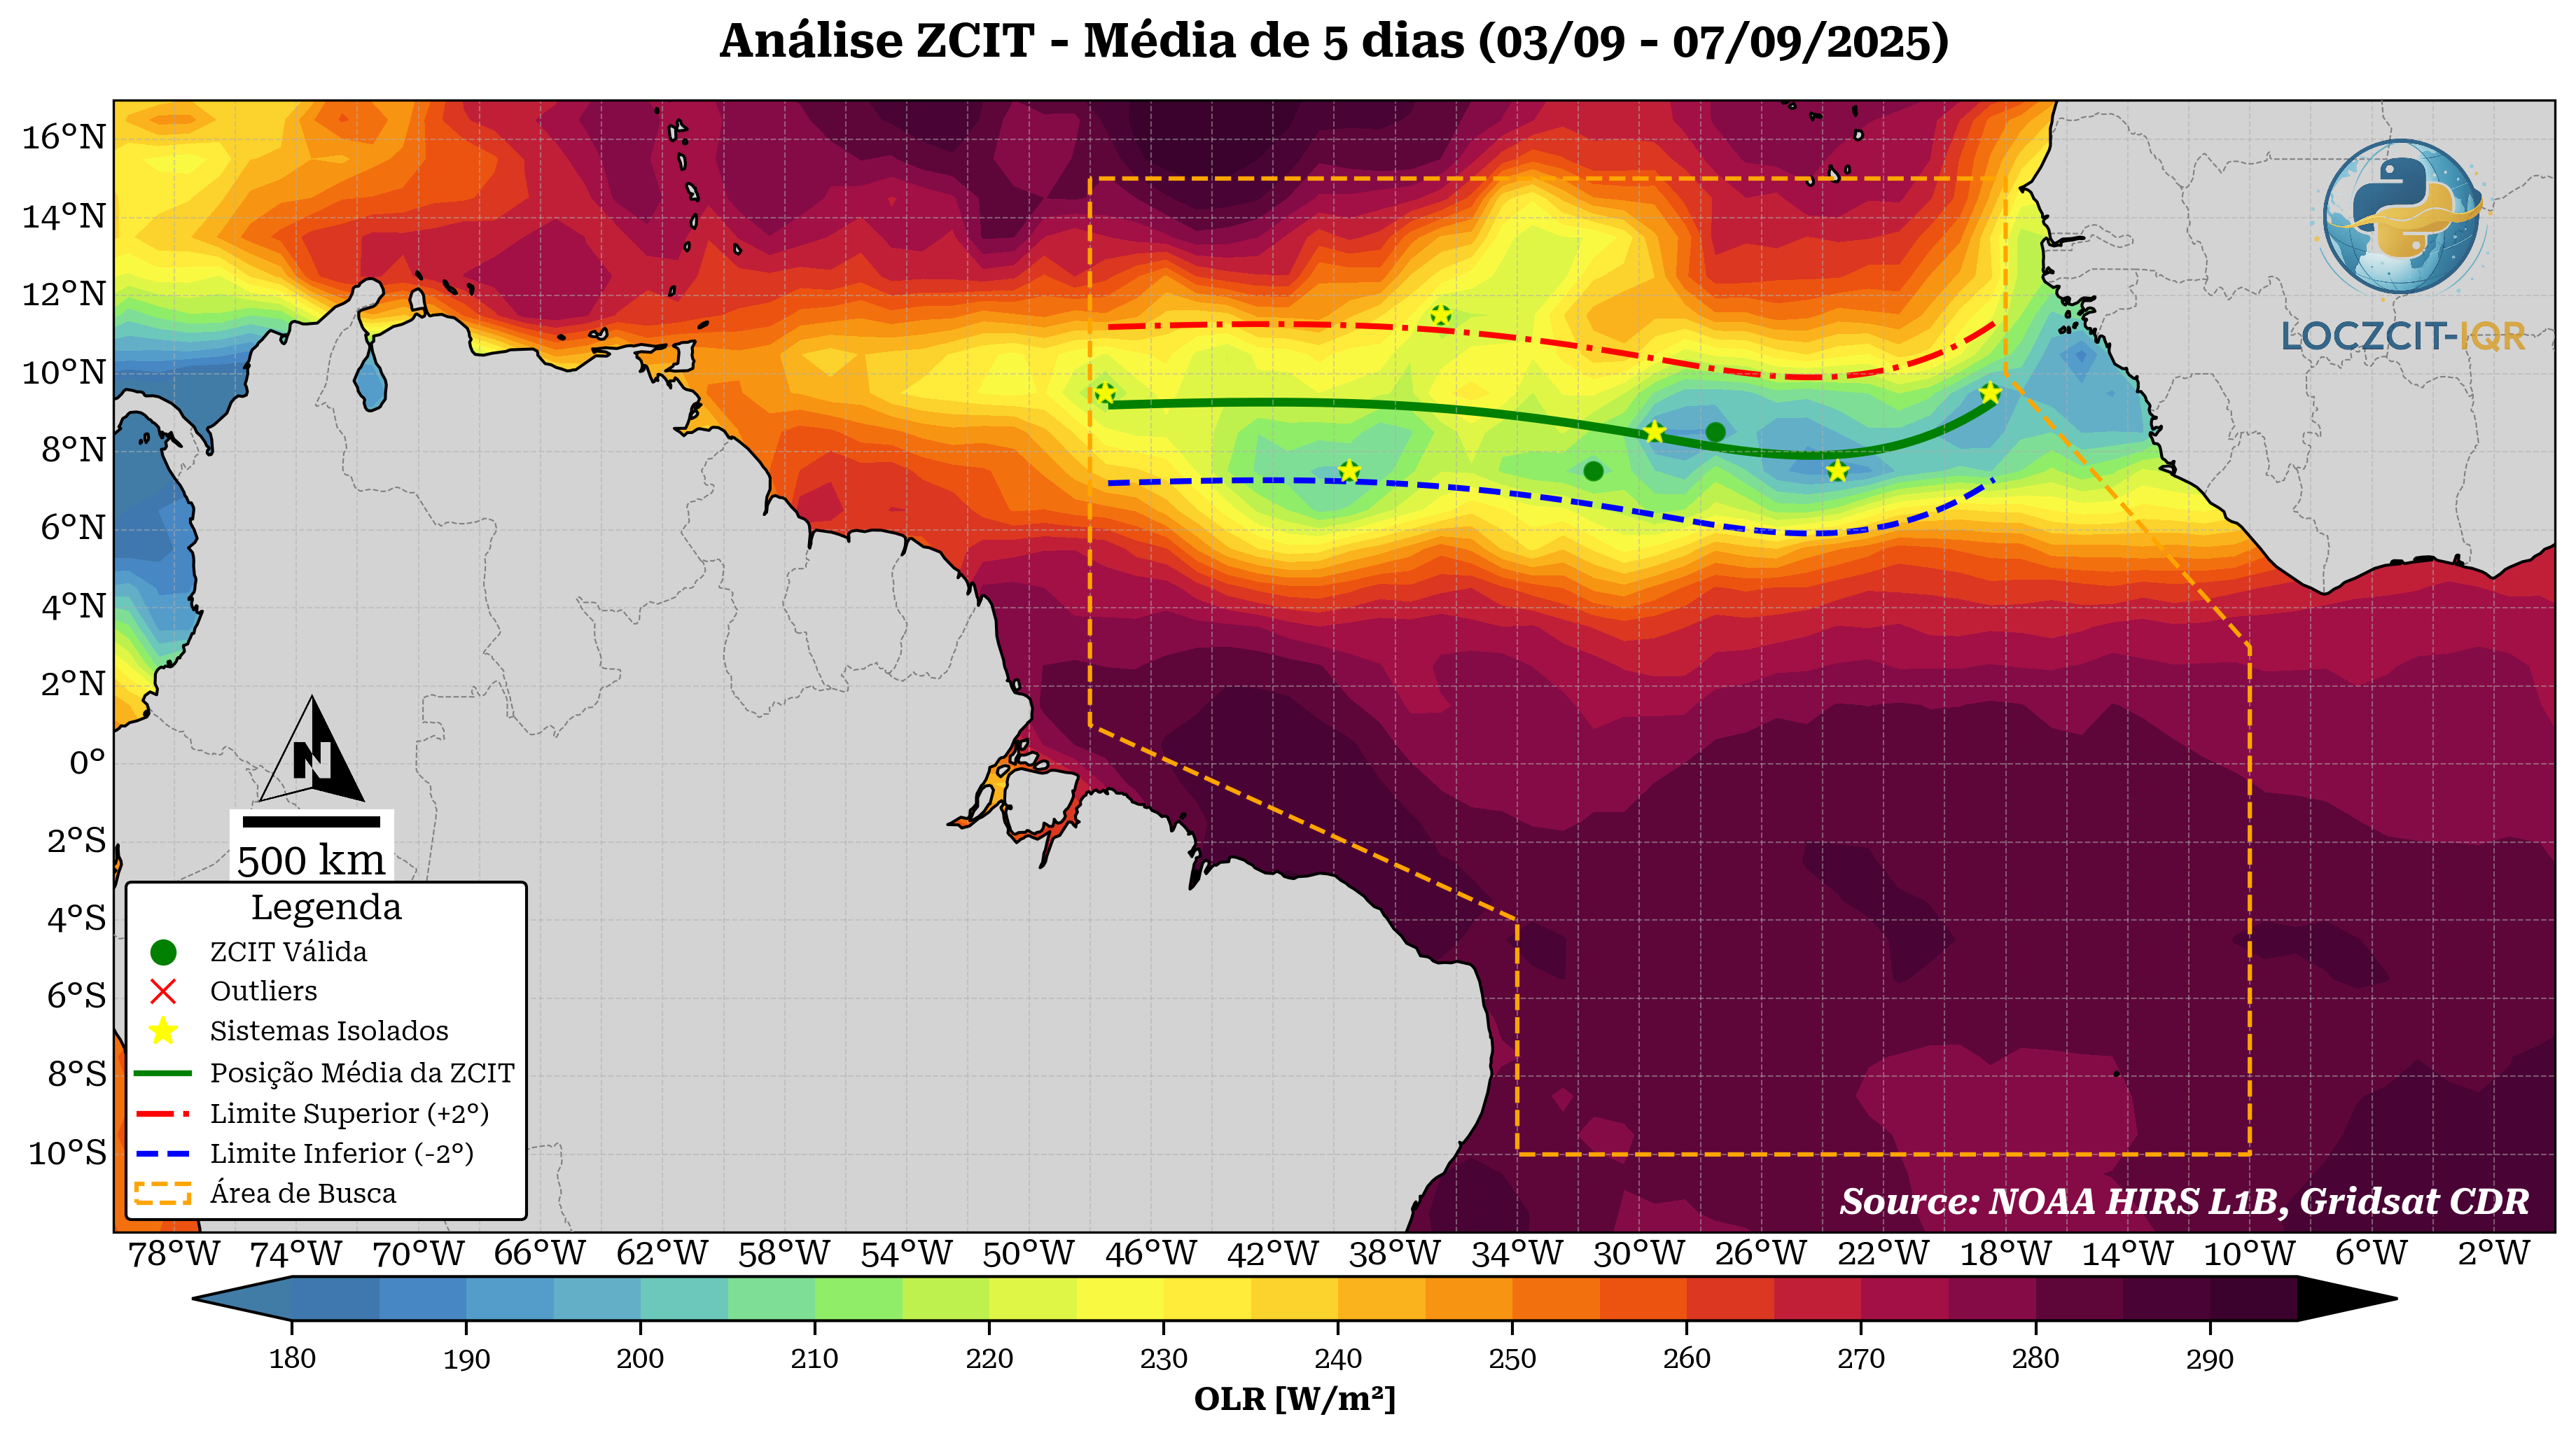

In [61]:
import pandas as pd
import os

from loczcit_iqr.core.data_loader import NOAADataLoader
from loczcit_iqr.core.processor import DataProcessor
from loczcit_iqr.core.iqr_detector import IQRDetector
from loczcit_iqr.core.spline_interpolator import SplineInterpolator, SplineParameters, InterpolationMethod
from loczcit_iqr.plotting.visualizer import *

# =============================================================================
# 1. CARREGAMENTO E PROCESSAMENTO
# =============================================================================
ano = 2025
loader = NOAADataLoader()
processor = DataProcessor()
print(f"Carregando dados diários para {ano}...")
olr_data = loader.load_data(start_date=f"{ano}-01-01", end_date=f"{ano}-12-31")
print("\nCalculando a média de OLR para o período mais recente...")
olr_recente = processor.process_latest_period(olr_data, num_days=5)
print("Média recente calculada com sucesso.")

# =============================================================================
# 2. ANÁLISE DA ZCIT
# =============================================================================
print(f"\nIniciando análise para o período recente...")
detector = IQRDetector()
interpolator = SplineInterpolator()
min_coords = processor.find_minimum_coordinates(
    data_array=olr_recente, method='column_minimum', search_radius=1
)
coords_valid, coords_outliers, resumo = detector.detect_outliers(min_coords)
sistemas_convectivos = processor.find_minimum_coordinates(
    data_array=olr_recente, threshold=230, method='local_minimum', search_radius=2
)
params_bspline = SplineParameters(
    method=InterpolationMethod.BSPLINE, smooth_factor='high', degree=3, 
    num_points_output=100, extrapolate_flag=True, reference_latitude=0
)
zcit_line, _ = interpolator.interpolate(coords_valid, parameters=params_bspline)
print("Análise concluída.")

# =============================================================================
# 3. VISUALIZAÇÃO
# =============================================================================

# --- Preparar o título ---
start_str = olr_recente.attrs['period_start']
end_str = olr_recente.attrs['period_end']
start_date_title = pd.to_datetime(start_str)
end_date_title = pd.to_datetime(end_str)
titulo_customizado = (
    f"Análise ZCIT - Média de 5 dias "
    f"({start_date_title.strftime('%d/%m')} - {end_date_title.strftime('%d/%m/%Y')})"
)

# --- Chamar o método "mestre" ---
viz = ZCITVisualizer(template='publication')
fig, ax = viz.plot_complete_analysis(
    olr_data=olr_recente,
    title=titulo_customizado,
    coords_valid=coords_valid,
    coords_outliers=coords_outliers,
    sistemas_convectivos=sistemas_convectivos,
    zcit_line=zcit_line,
    study_area_visible=True,
    save_path=None # ou 'minha_figura.png' para salvar
)

# --- Mostrar o Gráfico ---
plt.show()